shopping dataset link:https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/

Content
This dataset encompasses various features related to customer shopping preferences, gathering essential information for businesses seeking to enhance their understanding of their customer base. The features include customer age, gender, purchase amount, preferred payment methods, frequency of purchases, and feedback ratings. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses looking to apply data-driven insights for better decision-making and customer-centric strategies.

Dataset Glossary (Column-wise)

Customer ID - Unique identifier for each customer.

Age - Age of the customer.

Gender - Gender of the customer (Male/Female).

Item Purchased - The item purchased by the customer.

Category - Category of the item purchased.

Purchase Amount (USD) - The amount of the purchase in USD.

Location - Location where the purchase was made.

Size - Size of the purchased item.

Color - Color of the purchased item.

Season - Season during which the purchase was made.

Review Rating - Rating given by the customer for the purchased item.

Subscription Status - Indicates if the customer has a subscription (Yes/No).

Shipping Type - Type of shipping chosen by the customer.

Discount Applied - Indicates if a discount was applied to the purchase (Yes/No).

Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No).

Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction.

Payment Method - Customer's most preferred payment method.

Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

In [223]:
colors = ["#89CFF0", "#FF69B4", "#00CED1", "#DA70D6", "#7FFF00",
          "#FF7F50", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA"]

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/shopping_trends_updated.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [226]:
data.shape

(3900, 18)

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [228]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [229]:
data.duplicated().sum()

0

In [230]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [231]:
data.describe(include=("object")).T

,count,unique,top,freq
Gender,3900,2,Male,2652
Item Purchased,3900,25,Blouse,171
Category,3900,4,Clothing,1737
Location,3900,50,Montana,96
Size,3900,4,M,1755
Color,3900,25,Olive,177
Season,3900,4,Spring,999
Subscription Status,3900,2,No,2847
Shipping Type,3900,6,Free Shipping,675
Discount Applied,3900,2,No,2223


Text(0.5, 1.0, 'Age Distribution Histogram')

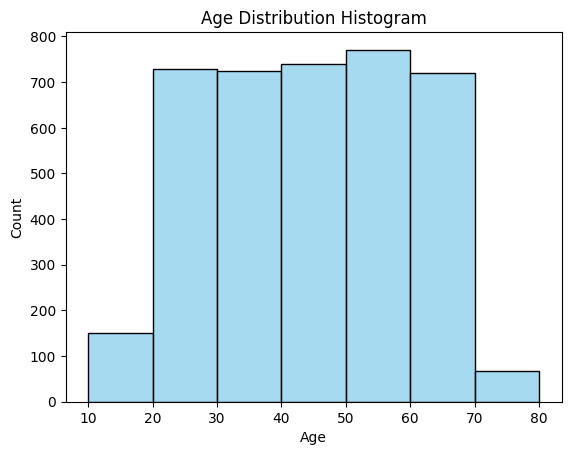

In [232]:
# plt.hist(data["Age"])
ax = sns.histplot( data= data,x="Age",bins=[10,20,30,40,50,60,70,80],color="skyblue")
ax.set_title('Age Distribution Histogram')

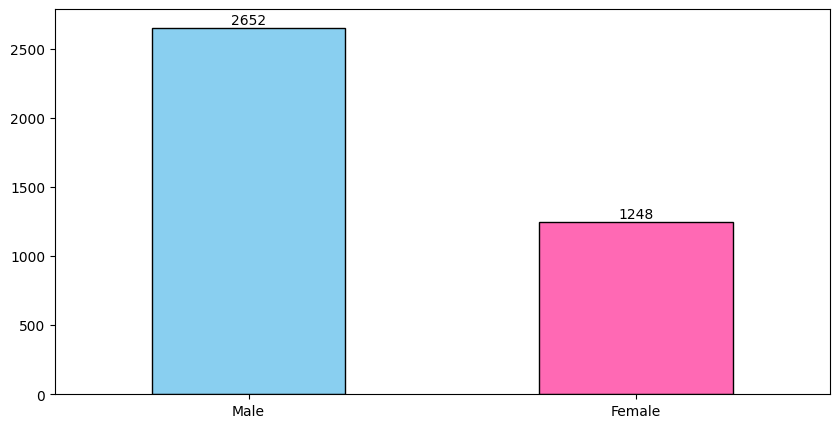

In [233]:
plt.figure(figsize = (10,5))
gen_val_count = data["Gender"].value_counts()
ax = gen_val_count.plot(kind="bar",edgecolor= "black",color=colors)
plt.xticks(rotation=0)

for i,v in enumerate(gen_val_count):
  ax.text(i, v,str(v),ha="center",va="bottom")


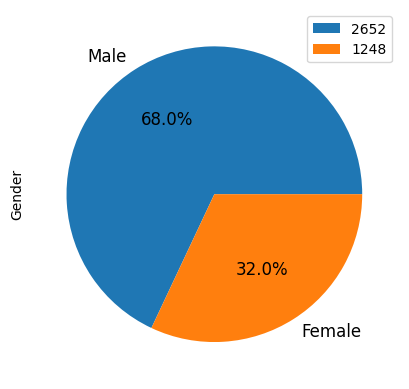

In [234]:
gen_val_count.plot(kind= "pie",fontsize = 12, autopct = '%1.1f%%')
plt.legend(labels = gen_val_count.values, loc="best")
# plt.xlabel("Gender",weight="bold")
plt.show()

In [235]:
item_val_count=data["Item Purchased"].value_counts()
item_val_count

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

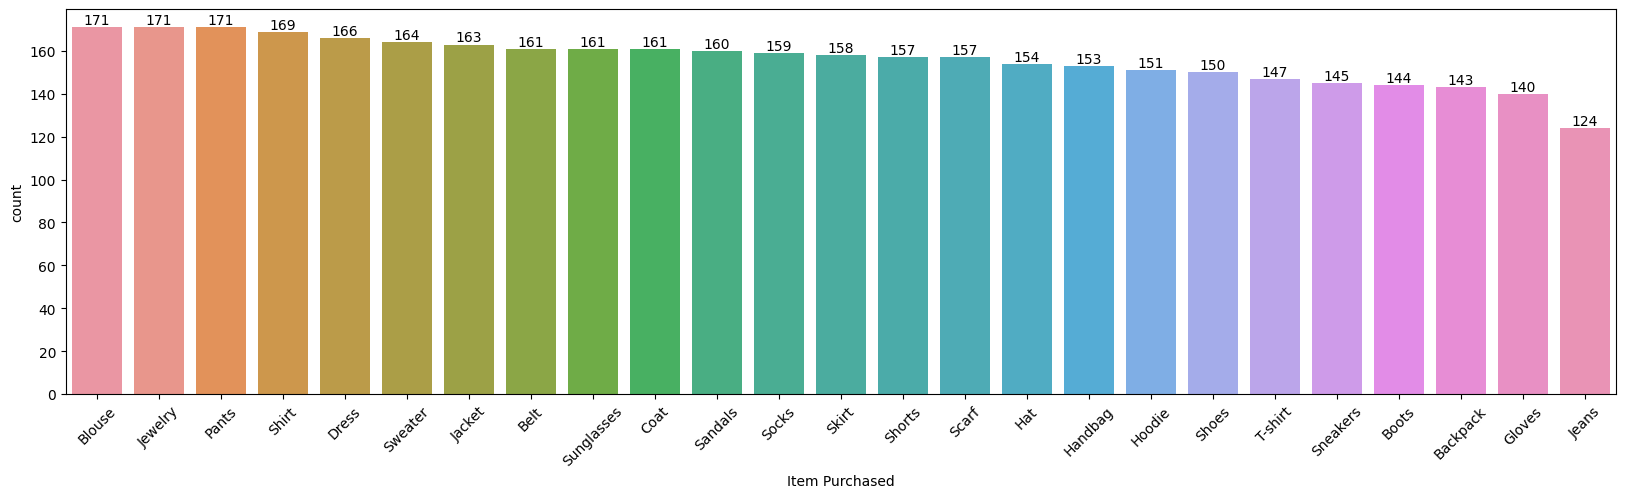

In [236]:
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(data=data,x="Item Purchased",order= item_val_count.index)
plt.xticks(rotation=45)
for i,v in enumerate(item_val_count):
  ax.text(i,v,str(v),ha="center",va="bottom")

Text(0.5, 1.0, 'Item Purchased')

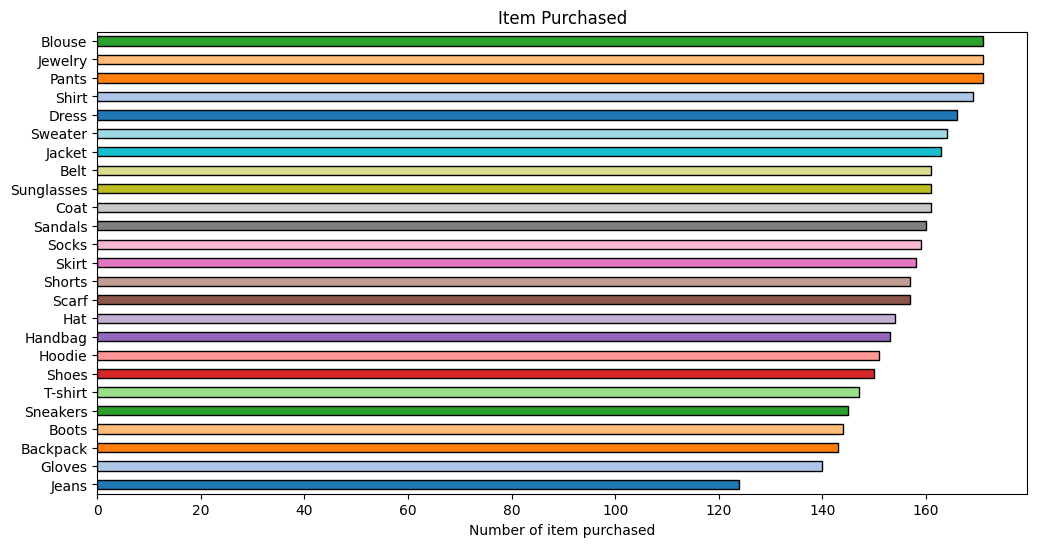

In [237]:
plt.figure(figsize=(12,6))
item_val_count.sort_values(ascending=True).plot(kind="barh",color=sns.color_palette("tab20"),edgecolor="black")
plt.xlabel("Number of item purchased")
plt.title("Item Purchased")

In [238]:
cat_val_count=data["Category"].value_counts()
cat_val_count

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

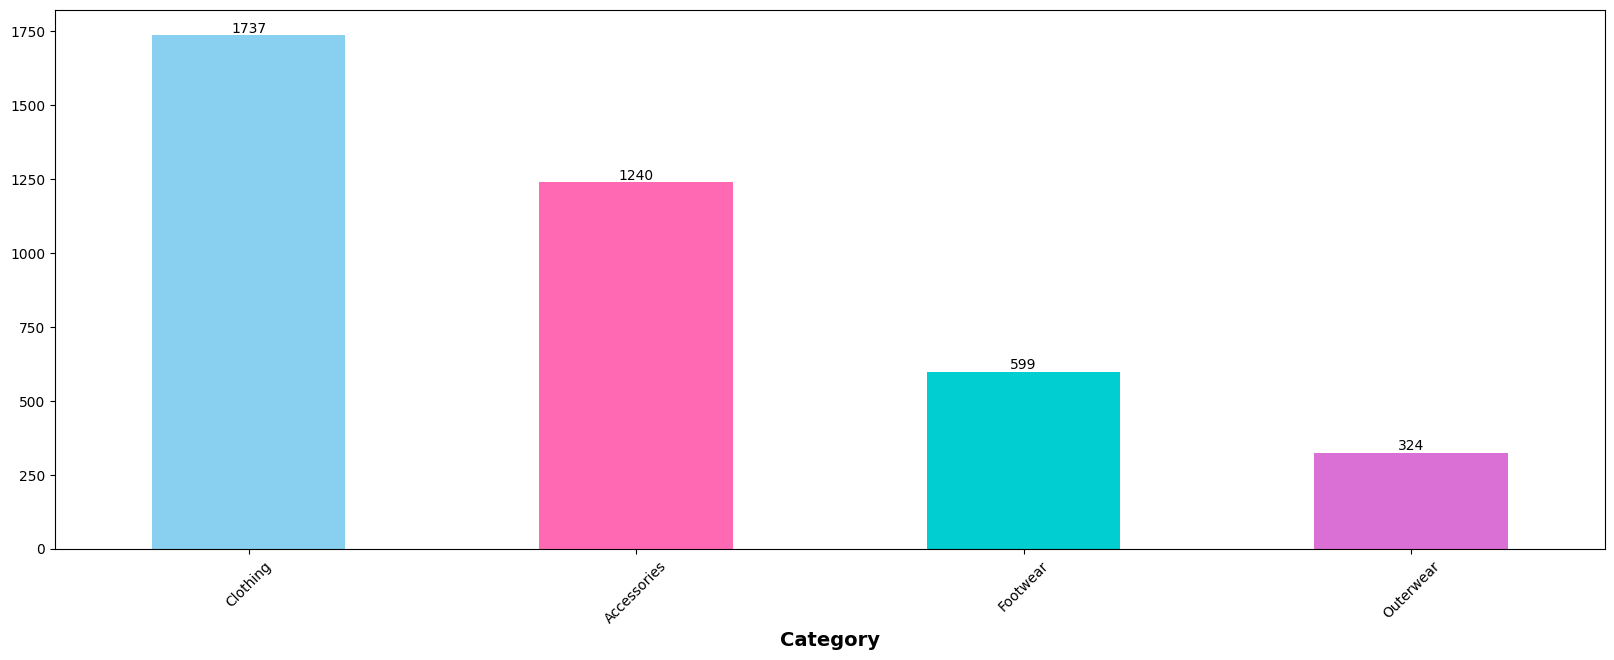

In [239]:
fig = plt.figure(figsize=(20,7))
ax = cat_val_count.plot(kind="bar",color=colors)
plt.xticks(rotation=45)
plt.xlabel("Category",fontsize=14,weight="bold")
for i,v in enumerate(cat_val_count):
  ax.text(i,v,str(v),ha="center",va="bottom")

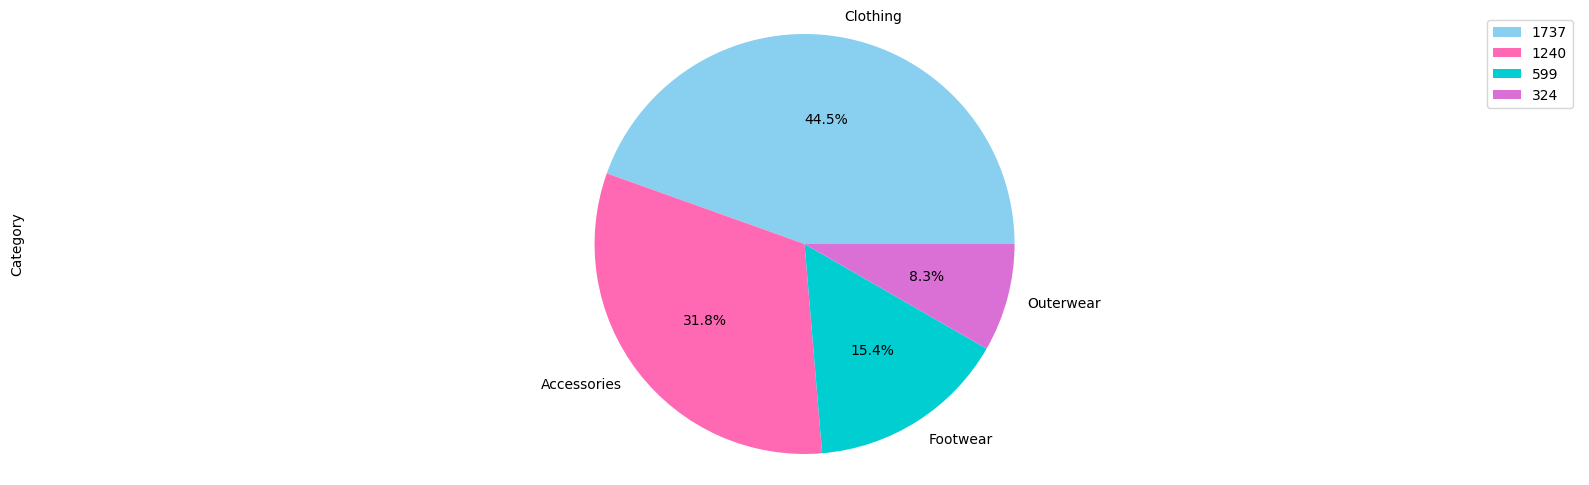

In [240]:
fig = plt.figure(figsize=(20,6))
cat_val_count.plot(kind="pie",autopct="%.1f%%",colors=colors)
plt.legend(cat_val_count.values,loc="best")
plt.axis("equal")
plt.show()

In [241]:
loc_val_count = data["Location"].value_counts()
loc_val_count

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

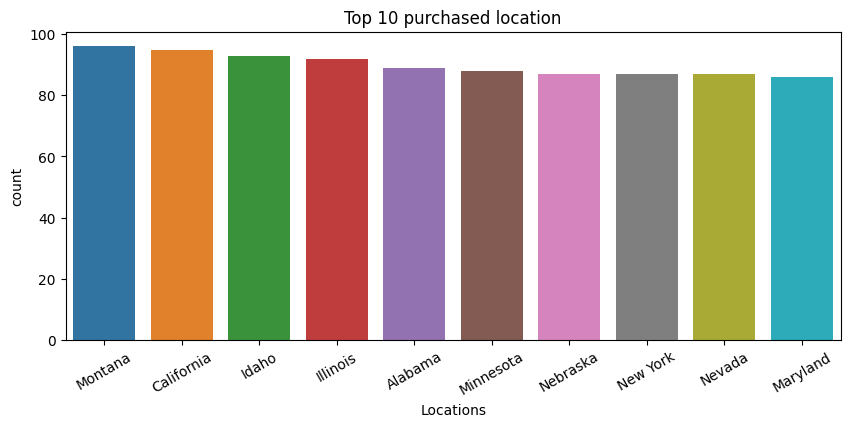

In [242]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x="Location",data=data,order=loc_val_count.head(10).index)
plt.xlabel("Locations")
plt.title("Top 10 purchased location")
plt.xticks(rotation=30)
plt.show()

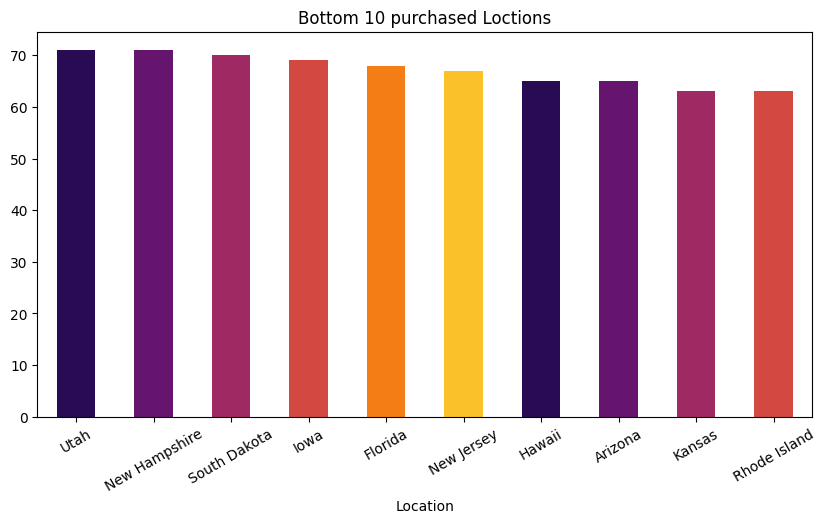

In [243]:
plt.figure(figsize=(10,5))
loc_val_count[-10:].plot(kind="bar",color=sns.color_palette("inferno"))
plt.xticks(rotation=30)
plt.title("Bottom 10 purchased Loctions")
plt.xlabel("Location")
plt.show()

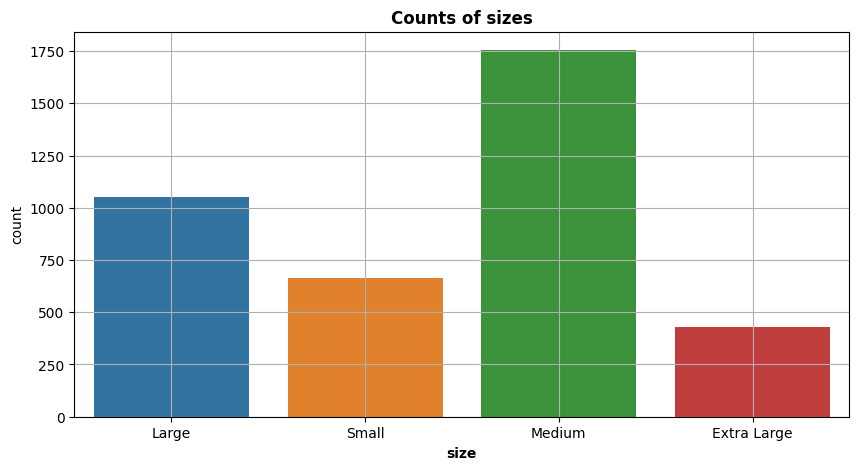

In [244]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = data["Size"])
ax.set_xticklabels(("Large","Small","Medium","Extra Large"))
plt.title("Counts of sizes",weight="bold")
plt.xlabel("size",weight="bold")
plt.grid(True)
# for i,v in enumerate(data["Size"].value_counts()):
#   plt.text(i,v,str(v),ha="center",va="bottom")

In [245]:
color_val_vount=data["Color"].value_counts()
color_val_vount

Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: Color, dtype: int64

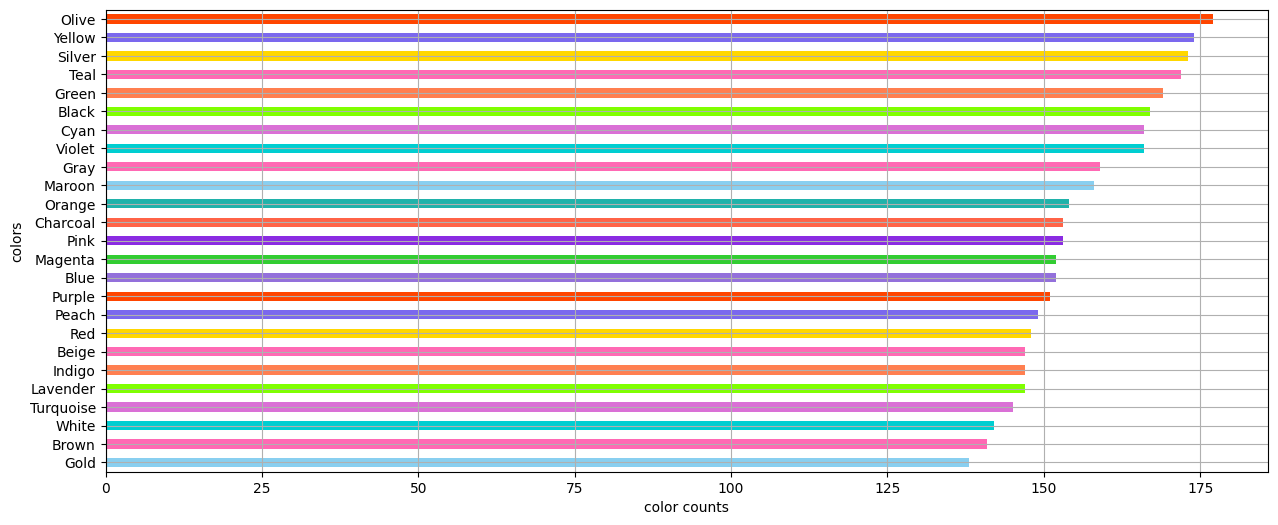

In [246]:
plt.figure(figsize=(15,6))
ax = color_val_vount.sort_values(ascending=True).plot(kind="barh",color=colors)
plt.xlabel("color counts")
plt.ylabel("colors")
plt.grid(True)
plt.show()

In [247]:
season_valcount = data["Season"].value_counts()
season_valcount

Spring    999
Fall      975
Winter    971
Summer    955
Name: Season, dtype: int64

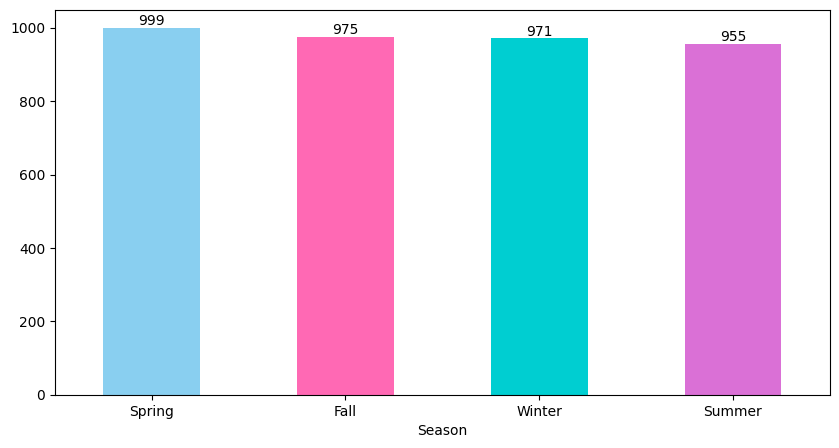

In [248]:
plt.figure(figsize=(10,5))
ax= season_valcount.sort_values(ascending=False).plot(kind="bar",color=colors)
plt.xlabel("Season")
plt.xticks(rotation=0)
for i,v in enumerate(season_valcount):
  ax.text(i,v,str(v),ha="center",va="bottom")

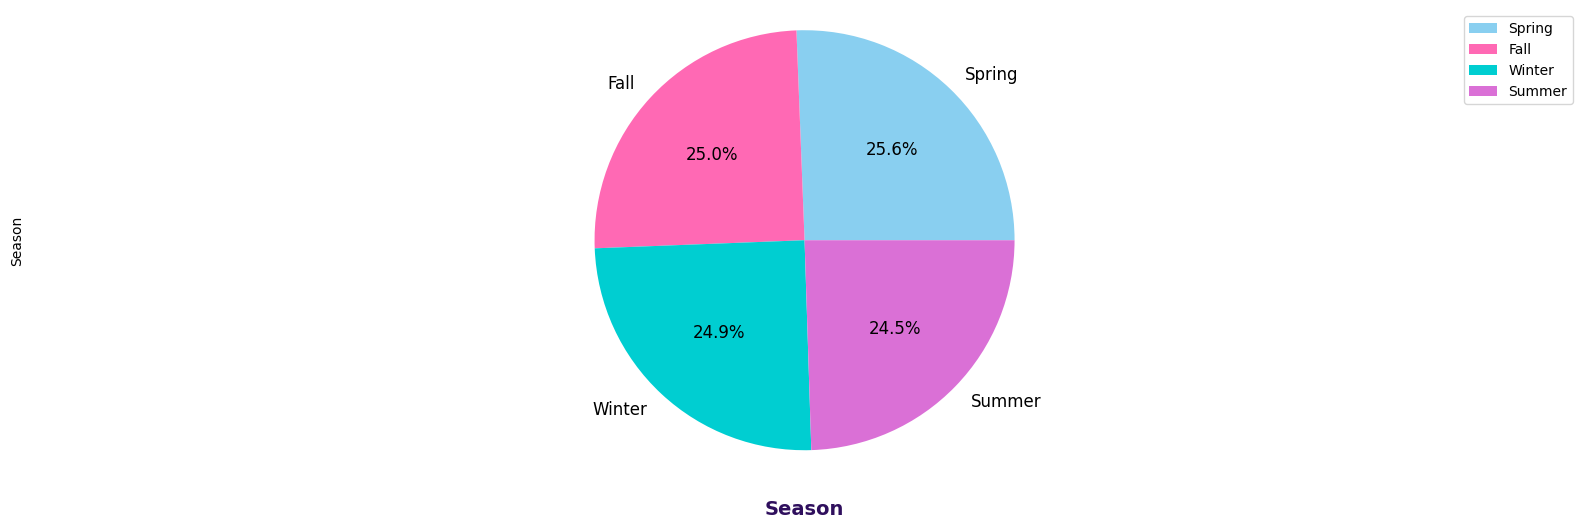

In [249]:
plt.figure(figsize = (20, 6))
explode = (0, 0, 0, 0)
season_valcount.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Season', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = season_valcount.index, loc = "best")
plt.show()

In [250]:
Ss_valcount = data["Subscription Status"].value_counts()
Ss_valcount

No     2847
Yes    1053
Name: Subscription Status, dtype: int64

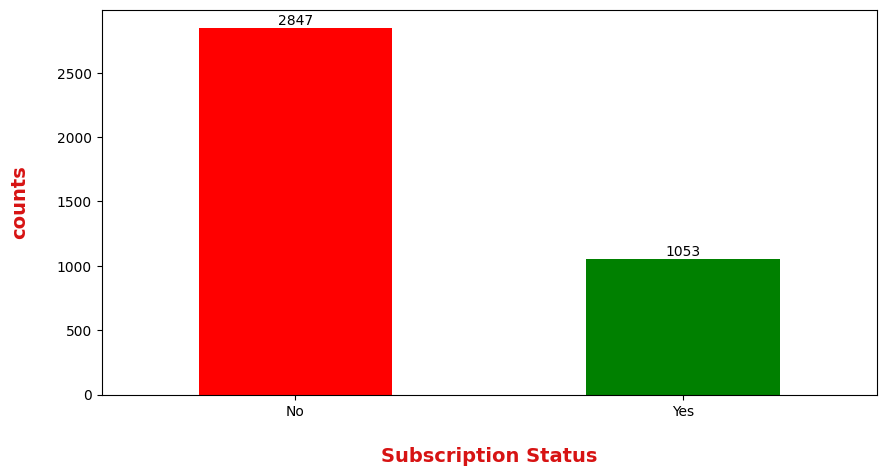

In [251]:
plt.figure(figsize = (10,5))
ax = Ss_valcount.plot(kind = 'bar', color = ["red","green"], rot = 0)
ax.set_xticklabels(('No', 'Yes'))
for i,v in enumerate(Ss_valcount):
  plt.text(i,v,str(v),ha="center",va="bottom")

plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

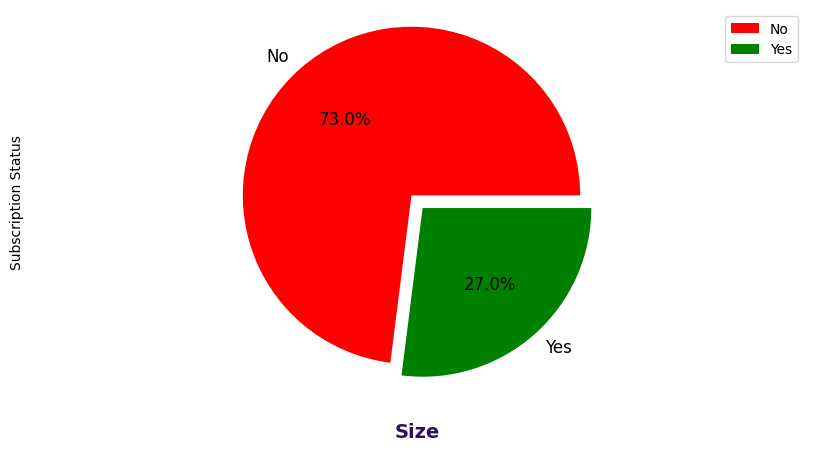

In [252]:
plt.figure(figsize = (10,5))
Ss_valcount = data["Subscription Status"].value_counts()
explode =(0, 0.1)

Ss_valcount.plot(kind = 'pie', fontsize = 12, colors = ["red","green"], explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = Ss_valcount.index, loc = "best")
plt.show()

Text(0.5, 1.0, 'Subscription status in each season')

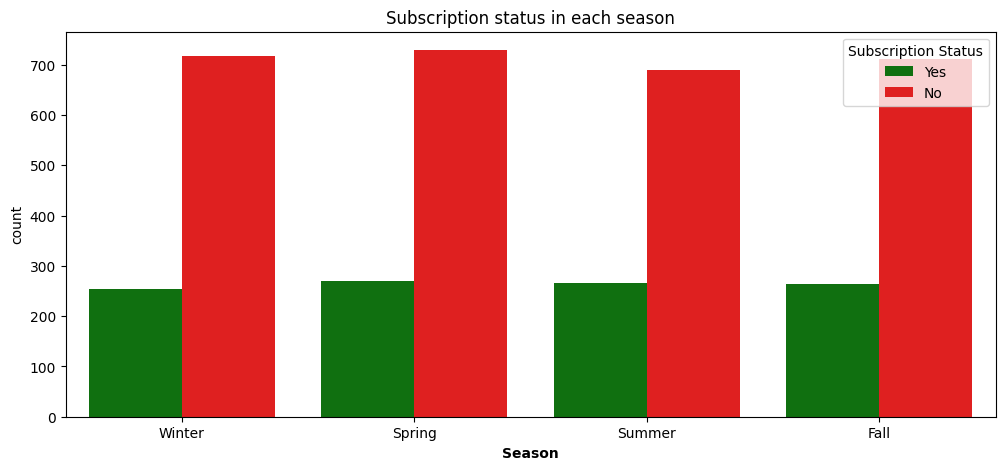

In [253]:
ax = plt.figure(figsize=(12,5))
leg_color={"Yes":"green","No":"red"}
ax = sns.countplot(x=data["Season"],hue=data["Subscription Status"],palette=leg_color)
plt.xlabel("Season",weight="bold")
plt.title("Subscription status in each season")

In [254]:
ship_valcount = data["Shipping Type"].value_counts()
ship_valcount

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

Text(0.5, 1.0, 'counts of Shipping type')

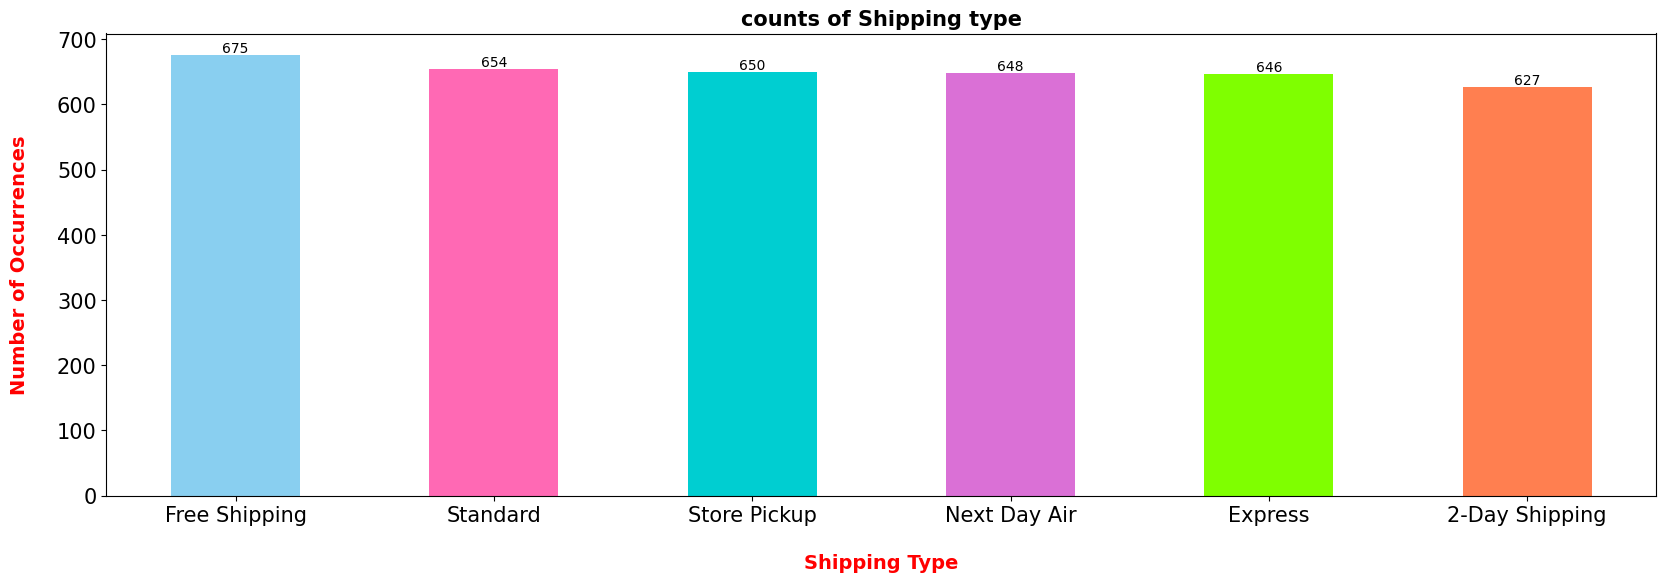

In [255]:
plt.figure(figsize = (20, 6))
ax = ship_valcount.plot(kind = 'bar', color = colors, rot = 0)
# ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for i,v in enumerate(ship_valcount):
    ax.text(i,v,str(v), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "red", fontsize = 14, labelpad = 20)
plt.title("counts of Shipping type", weight = "bold", color = "black", fontsize = 15)

In [256]:
pay_valcount=data["Payment Method"].value_counts()
pay_valcount

PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: Payment Method, dtype: int64

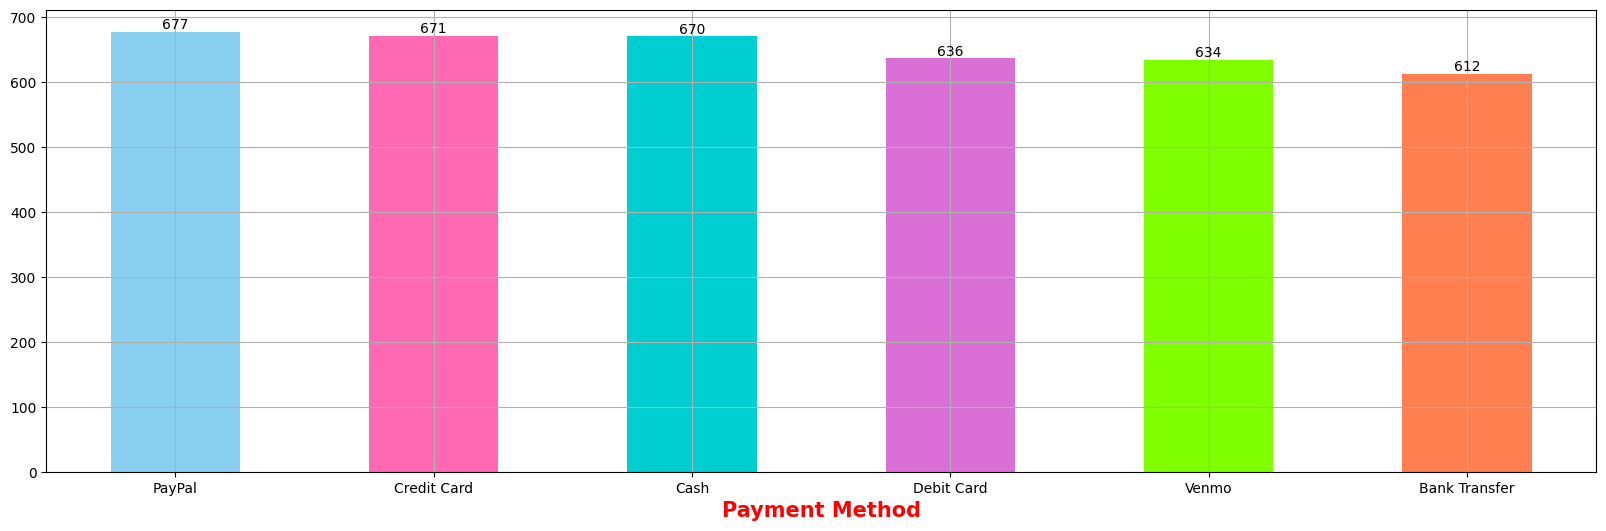

In [257]:
plt.figure(figsize=(20,6))
ax = pay_valcount.sort_values(ascending=False).plot(kind="bar",color=colors,grid=True)
plt.xticks(rotation=0)
plt.xlabel("Payment Method",weight="bold",size=15,color="r")
for i,v in enumerate(pay_valcount):
  ax.text(i,v,str(v),ha="center",va="bottom")

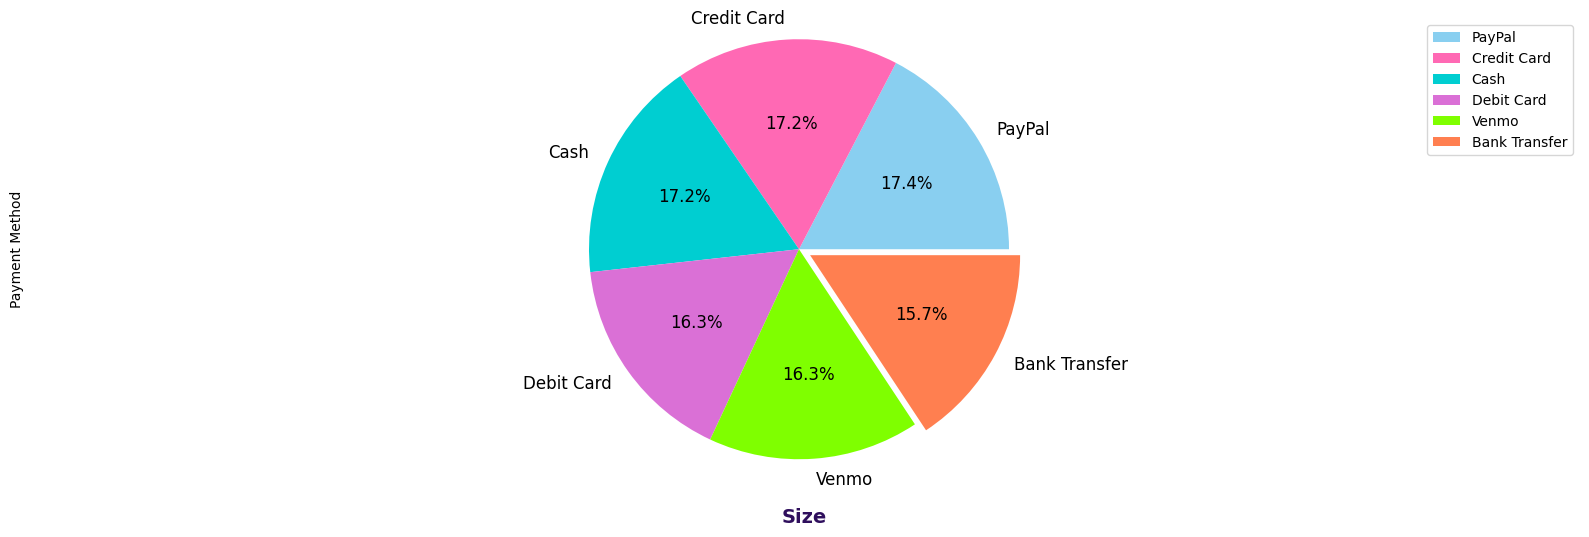

In [258]:
plt.figure(figsize = (20, 6))
pay_valcount = data["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)
pay_valcount.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = pay_valcount.index, loc = "best")
plt.show()

In [259]:
fop_valcount= data["Frequency of Purchases"].value_counts()
fop_valcount

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

Text(0.5, 1.0, 'Frequency of Purchase')

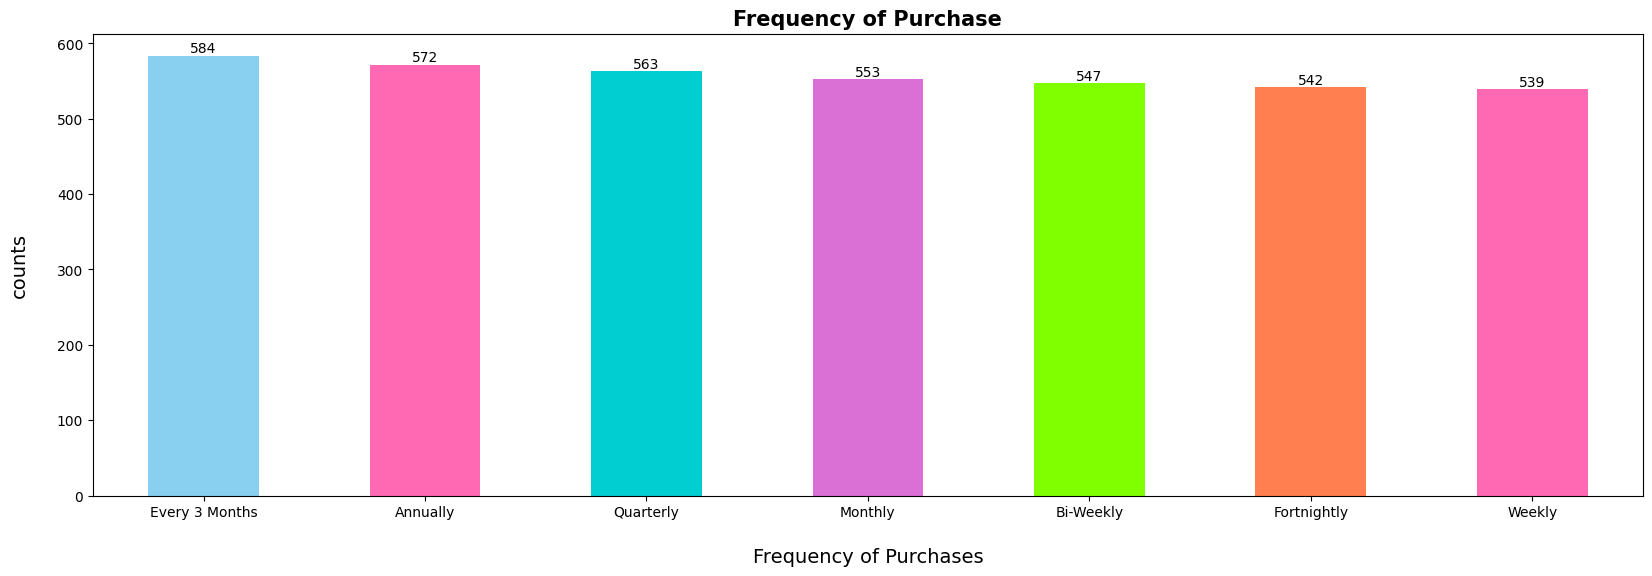

In [260]:
plt.figure(figsize = (20, 6))
ax = fop_valcount.plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for i,v in enumerate(fop_valcount):
  ax.text(i,v,str(v),ha="center",va="bottom")
plt.xlabel('Frequency of Purchases',  color = "black", fontsize = 14, labelpad = 20)
plt.ylabel('counts',  color = "black", fontsize = 14, labelpad = 20)
plt.title("Frequency of Purchase",weight="bold",size=15)

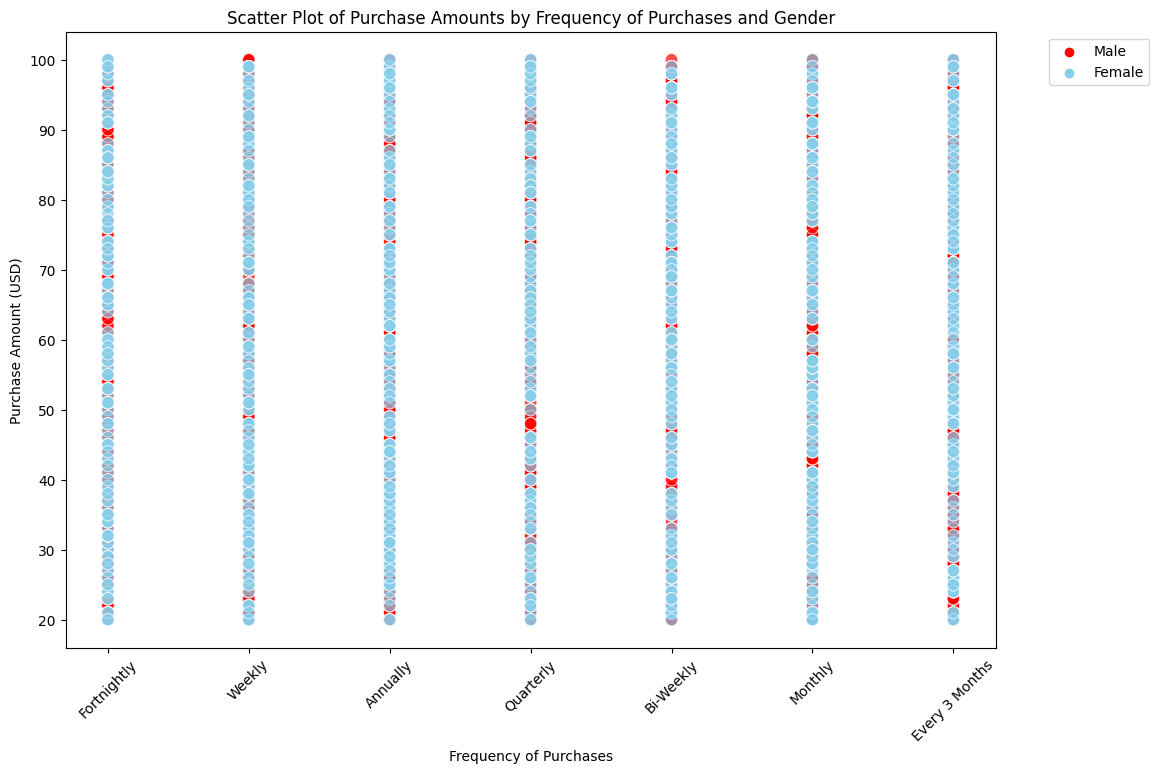

In [261]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=data, hue='Gender', palette={'Male': 'red', 'Female': 'skyblue'}, alpha=0.7, s=80)
plt.xlabel('Frequency of Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.title('Scatter Plot of Purchase Amounts by Frequency of Purchases and Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


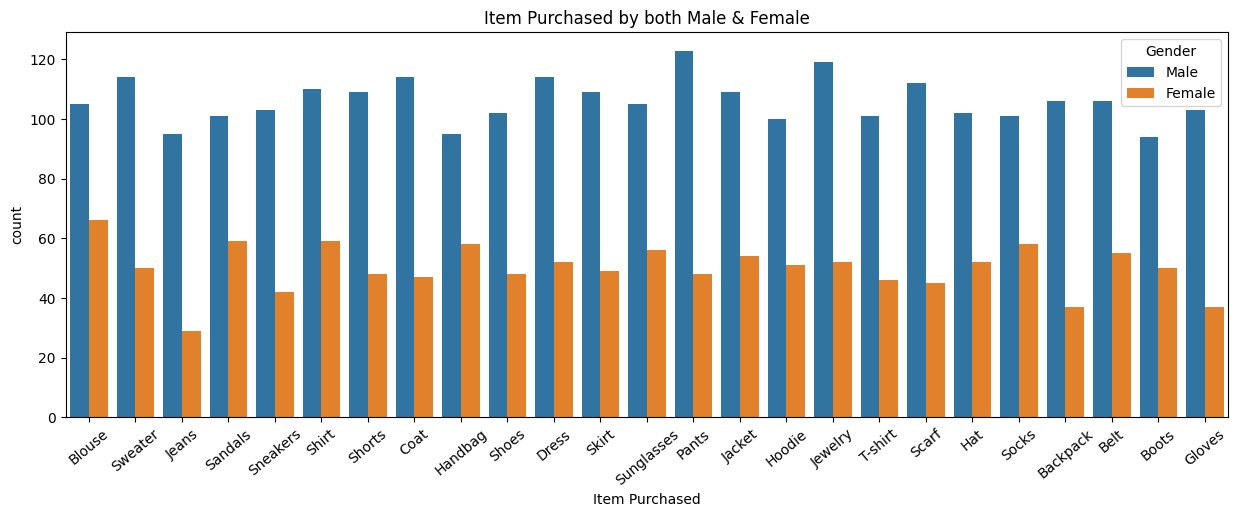

In [262]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["Item Purchased"],hue=data["Gender"])
plt.xticks(rotation=40)
plt.title("Item Purchased by both Male & Female")
plt.show()

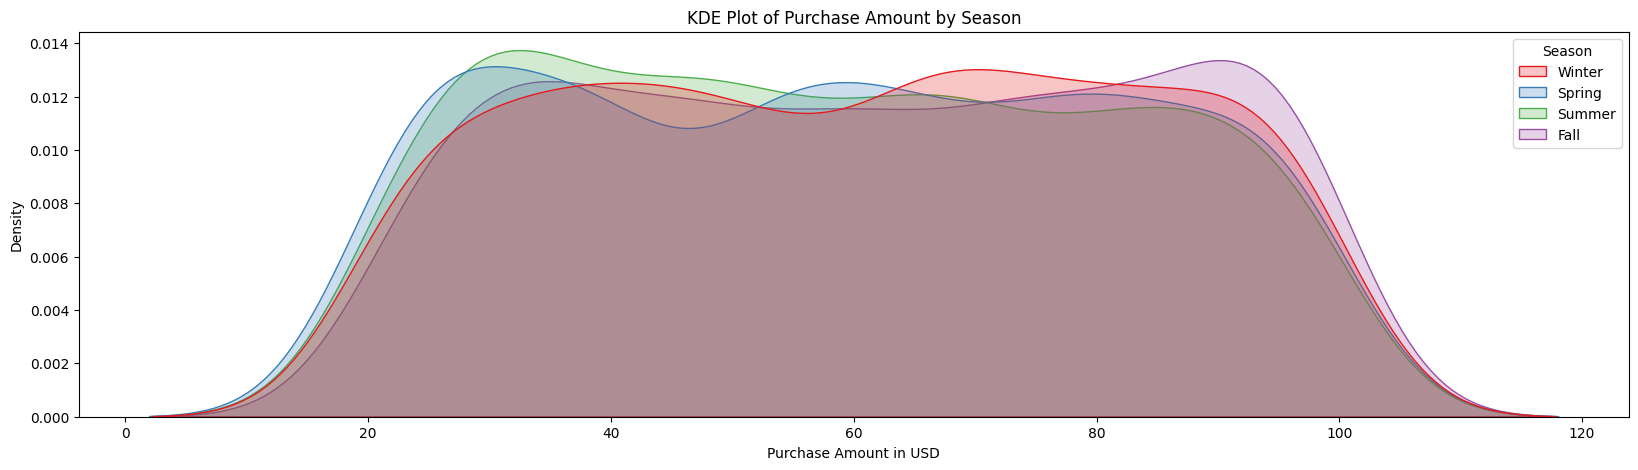

In [263]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = data, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

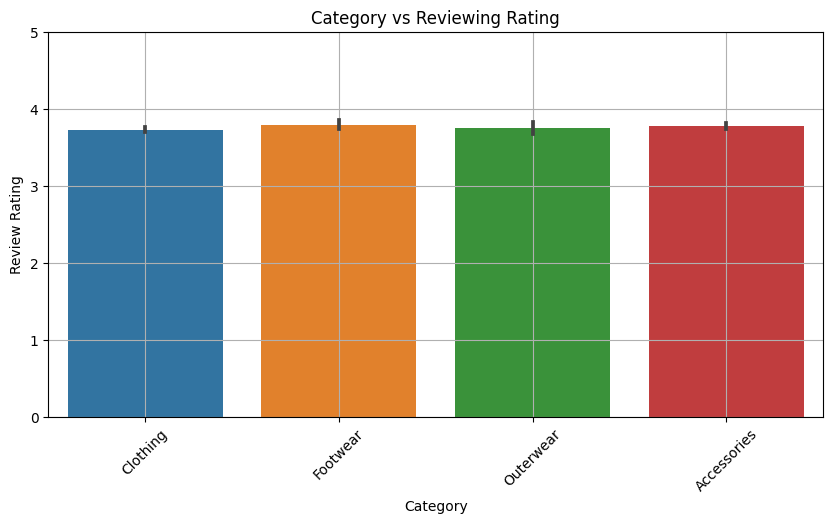

In [265]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=data["Category"],y=data["Review Rating"])
plt.xticks(rotation=45)
plt.ylim(0,5)
plt.title("Category vs Reviewing Rating")
plt.grid(True)
plt.show()